# Importing Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from keras.layers import Dropout, Dense, BatchNormalization
from keras.models import Sequential
from keras import regularizers

import pickle
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve
%matplotlib inline

import joblib
from joblib import load, dump

import warnings
warnings.filterwarnings('ignore')

In [23]:
X_train1, y_train1, X_test1, y_test1 = joblib.load('smote_dataset_splits.joblib')

In [25]:
X_train1.shape

(49112, 18)

In [26]:
y_train1.value_counts()

is_laundering
0    40087
1     9025
Name: count, dtype: int64

### Building the model

In [27]:
model = Sequential([
   Dense(64, input_shape=(18,), activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss= 'binary_crossentropy',
    metrics= ['accuracy',
              tf.keras.metrics.Recall(name='recall'), 
        tf.keras.metrics.AUC(name='pr_auc', curve='PR')]
)

# for early stopping
earlystopper = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

weights = {0: 1, 1: 10} # Give fraud cases 10x more importance

In [28]:

history2 = model.fit(
    X_train1, y_train1, 
    class_weight= weights,
    epochs = 500, 
    batch_size = 32, 
    shuffle = True, 
    validation_data = [X_test1, y_test1], 
    verbose = 1,
    callbacks = [earlystopper]
    )


Epoch 1/500
1535/1535 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7329 - loss: 1.0342 - pr_auc: 0.6383 - recall: 0.8894 - val_accuracy: 0.8752 - val_loss: 0.5171 - val_pr_auc: 0.4512 - val_recall: 0.5536
Epoch 2/500
1535/1535 ━━━━━━━━━━━━━━━━━━━━ 2s 986us/step - accuracy: 0.7791 - loss: 0.7842 - pr_auc: 0.7462 - recall: 0.9389 - val_accuracy: 0.6671 - val_loss: 0.5443 - val_pr_auc: 0.4459 - val_recall: 0.8715
Epoch 3/500
1535/1535 ━━━━━━━━━━━━━━━━━━━━ 1s 956us/step - accuracy: 0.7880 - loss: 0.7173 - pr_auc: 0.7797 - recall: 0.9508 - val_accuracy: 0.8732 - val_loss: 0.3811 - val_pr_auc: 0.4036 - val_recall: 0.7101
Epoch 4/500
1535/1535 ━━━━━━━━━━━━━━━━━━━━ 1s 967us/step - accuracy: 0.8013 - loss: 0.6922 - pr_auc: 0.7858 - recall: 0.9519 - val_accuracy: 0.7064 - val_loss: 0.4864 - val_pr_auc: 0.5122 - val_recall: 0.9208
Epoch 5/500
1535/1535 ━━━━━━━━━━━━━━━━━━━━ 1s 939us/step - accuracy: 0.7987 - loss: 0.6921 - pr_auc: 0.7779 - recall: 0.9506 - val_accuracy: 0.7595 - val_loss: 0.5070

In [20]:
history_dict = history2.history
history_dict

{'accuracy': [0.7141383290290833,
  0.7866189479827881,
  0.786223828792572,
  0.7981868982315063,
  0.8007331490516663,
  0.8040257096290588,
  0.8002941608428955,
  0.7973088622093201,
  0.8084816932678223,
  0.805518388748169,
  0.8020501732826233,
  0.8067914843559265,
  0.8121913075447083,
  0.811708390712738,
  0.8218056559562683,
  0.8187764883041382,
  0.814803421497345,
  0.818996012210846,
  0.8183374404907227,
  0.8134425282478333,
  0.8122791051864624,
  0.8214983344078064,
  0.8191496133804321,
  0.8180959820747375,
  0.817218005657196,
  0.8214105367660522,
  0.81682288646698],
 'loss': [0.852216362953186,
  0.6110445857048035,
  0.5877518653869629,
  0.5561145544052124,
  0.5452947020530701,
  0.5414839386940002,
  0.5362960696220398,
  0.5342282056808472,
  0.5100159645080566,
  0.5195874571800232,
  0.5221167206764221,
  0.5092571973800659,
  0.49850398302078247,
  0.5049615502357483,
  0.48453813791275024,
  0.4837678372859955,
  0.4898429214954376,
  0.48631796240806

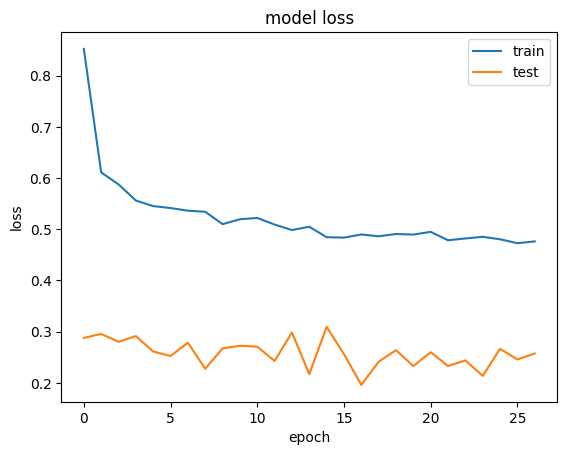

In [21]:
plt.plot(history_dict['loss'])
plt.plot(history_dict['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [22]:
y_prob = model.predict(X_test1)

# Convert to class labels
y_pred = (y_prob > 0.5).astype(int)

class_report = classification_report(y_test1, y_pred)
print(class_report)

356/356 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     10355
           1       0.57      0.48      0.52      1035

    accuracy                           0.92     11390
   macro avg       0.76      0.72      0.74     11390
weighted avg       0.91      0.92      0.92     11390



KeyError: 'val_loss'

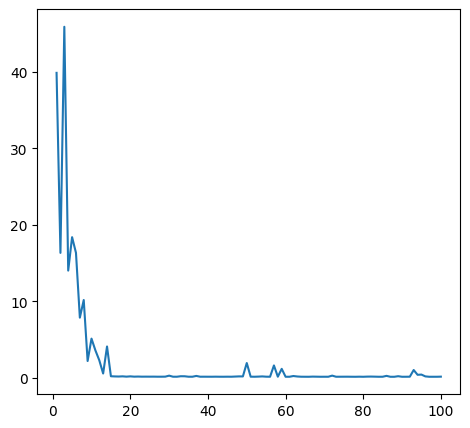

In [31]:

epochs = range(1, len(history.history['loss']) + 1)

plt.figure(figsize=(12,5))

# Loss
plt.subplot(1,2,1)
plt.plot(epochs, history.history['loss'], label='Train Loss')
plt.plot(epochs, history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs Epochs')

# Accuracy
plt.subplot(1,2,2)
plt.plot(epochs, history.history['accuracy'], label='Train Acc')
plt.plot(epochs, history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs Epochs')

plt.show()